In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("Marketing_data.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# check the one off purchase of 40k

df[df["ONEOFF_PURCHASES"] == 40761.25]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
df["CASH_ADVANCE"].max()

47137.211760000006

In [7]:
# check the cash advance of 47k

df[df["CASH_ADVANCE"] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


#### Preprocessing

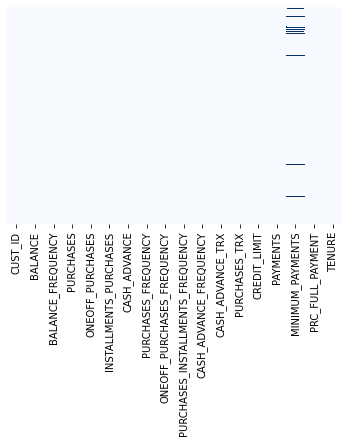

In [8]:
# check for missing data 
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# replace missing values with mean
min_payments_mean = df["MINIMUM_PAYMENTS"].mean()
CREDIT_LIMIT_mean = df["CREDIT_LIMIT"].mean()

In [11]:
min_payments_mean

864.2065423050814

In [12]:
df.loc[(df.MINIMUM_PAYMENTS.isnull() == True), "MINIMUM_PAYMENTS"] = min_payments_mean

In [13]:
df.loc[(df.CREDIT_LIMIT.isnull() == True), "CREDIT_LIMIT"] = CREDIT_LIMIT_mean

In [14]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [15]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
# check for duplicated
df.duplicated().sum()

0

In [17]:
# drop customer ID
df.drop(["CUST_ID"], axis = 1, inplace = True)

In [18]:
n =  len(df.columns)
n

17

In [19]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\luca.manfredi\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


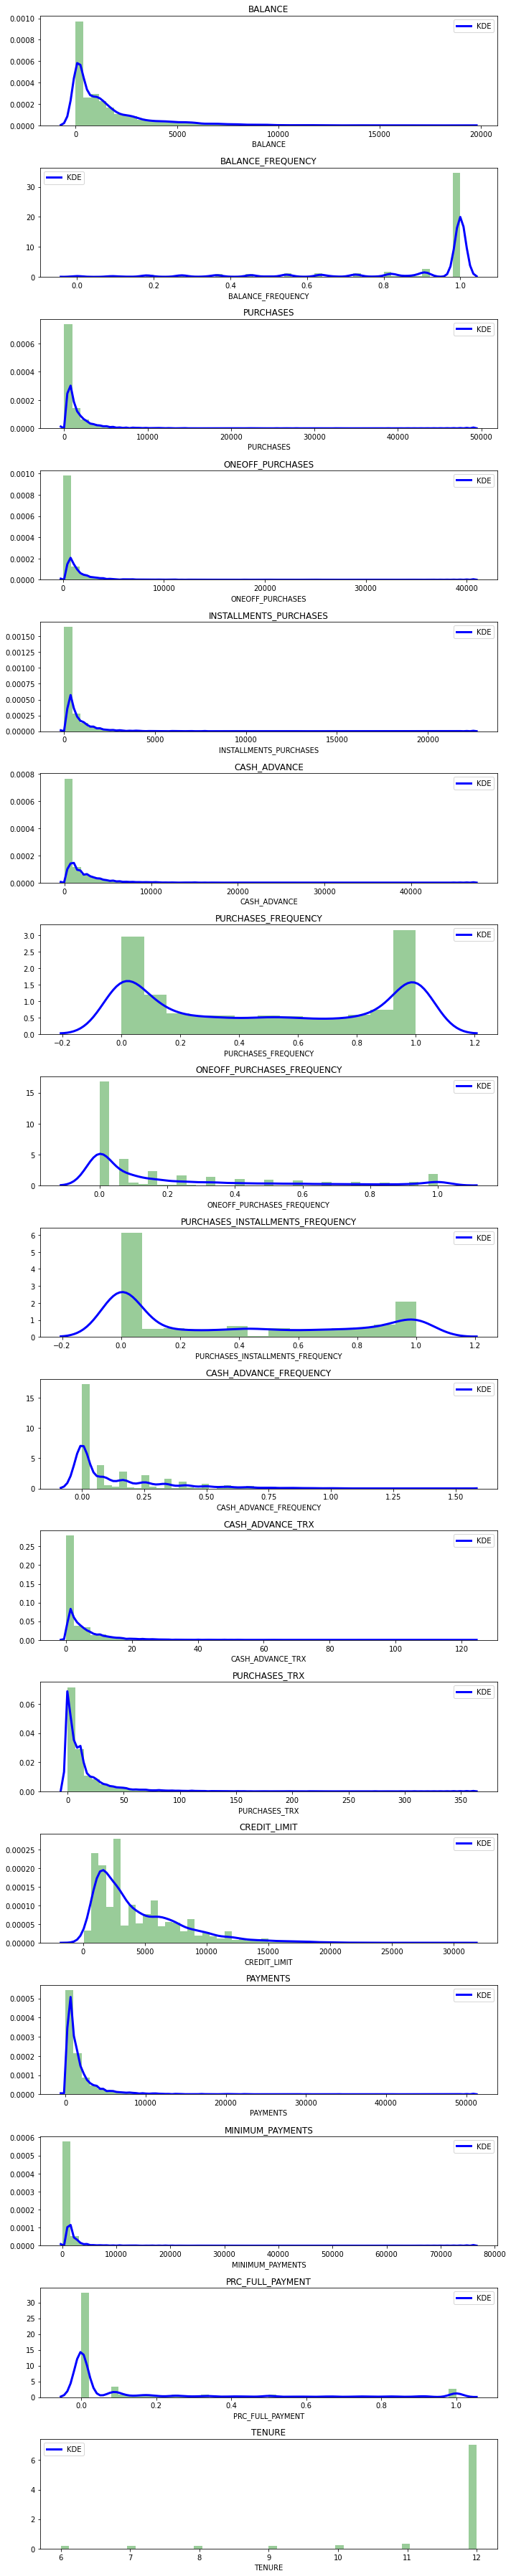

In [20]:
# Plot features

plt.figure(figsize = (10,50))

for i in range(len(df.columns)):
    plt.subplot(17, 1,  i+1) 
    sns.distplot(df[df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws= {"color":"g"}) # plot hist and kde
    
    plt.title(df.columns[i])     
    
plt.tight_layout()



#### Find optimal number of K

In [21]:
# scale data
sc = StandardScaler()
df_sc = sc.fit_transform(df) 

In [22]:
df_sc

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [23]:
# Elbow Plot 
score_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_sc)
    score_1.append(kmeans.inertia_) # inertia is the WCSS
    

In [24]:
score_1

[152149.9999999988,
 127784.97018120477,
 111986.98379929033,
 99073.93826774784,
 91501.83962245895,
 84851.29212769287,
 79634.61223251223,
 74489.9550759943,
 71373.91102629699,
 66479.09280976714,
 63632.70633785186,
 61352.96392669031,
 59174.25095756295,
 57506.09541682905,
 55966.58379309394,
 54528.198548200584,
 53250.87246940663,
 52032.959268284794,
 50810.59094718174]

<function matplotlib.pyplot.show(*args, **kw)>

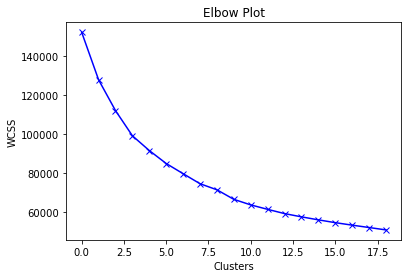

In [25]:
plt.plot(score_1, "bx-")
plt.title("Elbow Plot")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show

We pick K = 7 because after then it starts saturate

In [26]:
# Apply KMeans with K = 8
kmeans = KMeans(n_clusters = 8)
kmeans.fit(df_sc)
labels = kmeans.labels_

In [27]:
labels.shape

(8950,)

In [28]:
kmeans.cluster_centers_ 
# ndarray of shape (n_clusters, n_features) - Coordinates of cluster centers. 

array([[-7.01251133e-01, -2.14188440e+00, -3.10519995e-01,
        -2.35028765e-01, -3.02315577e-01, -3.22149896e-01,
        -5.55316390e-01, -4.42677102e-01, -4.40150257e-01,
        -5.21105180e-01, -3.76271667e-01, -4.19502384e-01,
        -1.75347597e-01, -2.02111124e-01, -2.56753809e-01,
         2.81920380e-01,  1.98840506e-01],
       [ 1.53217741e-02,  4.03752364e-01, -3.57759183e-01,
        -2.41974741e-01, -4.01254568e-01, -9.34532944e-02,
        -8.56767998e-01, -3.95544658e-01, -7.58075608e-01,
         1.06704485e-01, -2.53131735e-02, -4.82862310e-01,
        -3.03319057e-01, -2.49356927e-01, -5.31718596e-03,
        -4.55544179e-01,  2.73088841e-01],
       [-1.35122470e-01,  4.00025747e-01,  5.39964696e-01,
         6.70125732e-01,  4.54183508e-02, -3.31601864e-01,
         9.78235358e-01,  1.90350710e+00,  1.69207974e-01,
        -4.13853922e-01, -3.30316817e-01,  6.16791467e-01,
         4.29806447e-01,  1.43800307e-01, -1.58522746e-01,
         4.45564687e-01,  2.6

In [29]:
kmeans.cluster_centers_.shape

(8, 17)

In [30]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701251,-2.141884,-0.310520,-0.235029,-0.302316,-0.322150,-0.555316,-0.442677,-0.440150,-0.521105,-0.376272,-0.419502,-0.175348,-0.202111,-0.256754,0.281920,0.198841
1,0.015322,0.403752,-0.357759,-0.241975,-0.401255,-0.093453,-0.856768,-0.395545,-0.758076,0.106704,-0.025313,-0.482862,-0.303319,-0.249357,-0.005317,-0.455544,0.273089
2,-0.135122,0.400026,0.539965,0.670126,0.045418,-0.331602,0.978235,1.903507,0.169208,-0.413854,-0.330317,0.616791,0.429806,0.143800,-0.158523,0.445565,0.268855
3,1.053889,0.465888,2.466956,1.772021,2.577565,-0.155418,1.166544,1.531122,1.278111,-0.282109,-0.151742,3.087196,1.284011,1.422939,0.737820,0.240379,0.337910
4,-0.365322,0.332886,-0.036896,-0.242261,0.357648,-0.363831,0.988578,-0.382978,1.200111,-0.473842,-0.360246,0.186957,-0.260376,-0.216985,-0.052769,0.311518,0.256516
5,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
6,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809
7,1.686629,0.392160,-0.217160,-0.154524,-0.229652,2.022463,-0.471763,-0.206635,-0.413415,1.921368,1.927660,-0.266419,1.033259,0.824945,0.509965,-0.389164,0.069368


In [31]:
# Inverse transformation
cluster_centers = sc.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.879787,0.369878,339.774078,202.337758,137.687420,303.307732,0.267475,0.070399,0.189510,0.030866,0.681049,4.282572,3856.463151,1148.051951,265.852622,0.236172,11.783418
1,1596.365807,0.972916,238.846826,190.808861,48.218118,782.895189,0.146488,0.084459,0.063159,0.156497,3.076083,2.707681,3390.850625,1011.279982,851.815065,0.020476,11.882781
2,1283.228811,0.972033,2156.847729,1704.708833,452.138896,283.486514,0.882964,0.770311,0.431685,0.052328,0.994657,30.040962,6058.261151,2149.431652,494.775970,0.284035,11.877115
3,3758.054892,0.987635,6273.894903,3533.629086,2741.927867,652.952246,0.958541,0.659221,0.872392,0.078691,2.213296,91.445983,9166.204986,5852.412262,2583.664264,0.224021,11.969529
4,804.087859,0.956128,924.375932,190.333480,734.484014,215.901247,0.887115,0.088208,0.841392,0.040324,0.790410,19.356896,3547.093525,1104.994922,741.231373,0.244828,11.860603
5,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
6,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140
7,5075.051265,0.970170,539.238120,335.959089,203.396298,5220.070152,0.301009,0.140814,0.200135,0.519630,16.403691,8.087659,8253.869141,4121.278213,2052.657705,0.039891,11.610150


In [32]:
labels.shape

(8950,)

In [33]:
print(labels.min())
print(labels.max()) 

0
7


In [34]:
# concat labels to original df to create a supervised df with a target variable
df_cl = pd.concat([df, pd.DataFrame({"Cluster":labels})], axis = 1)
df_cl.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


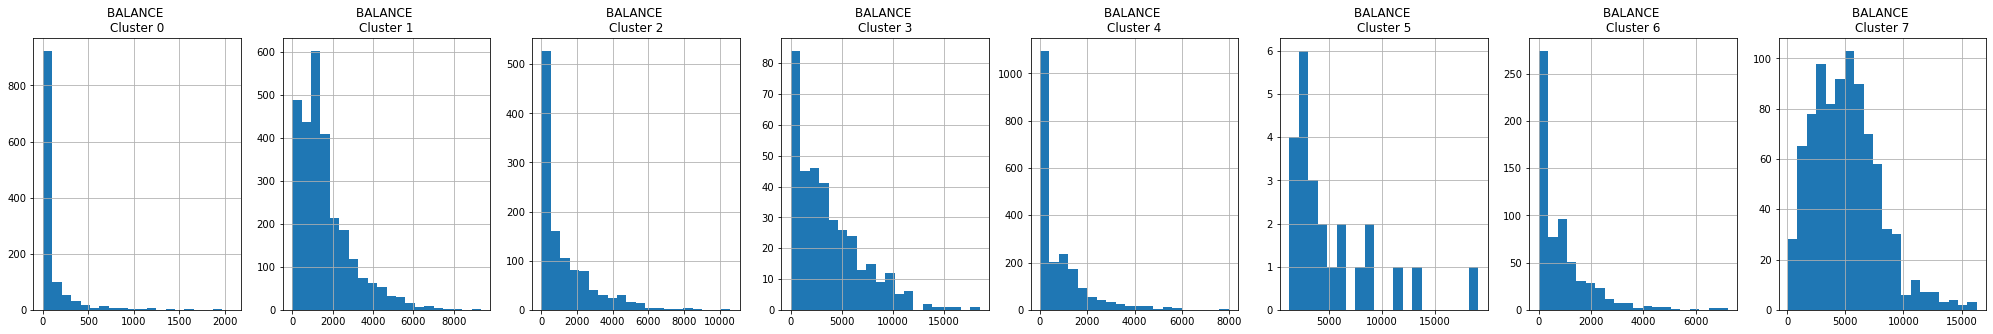

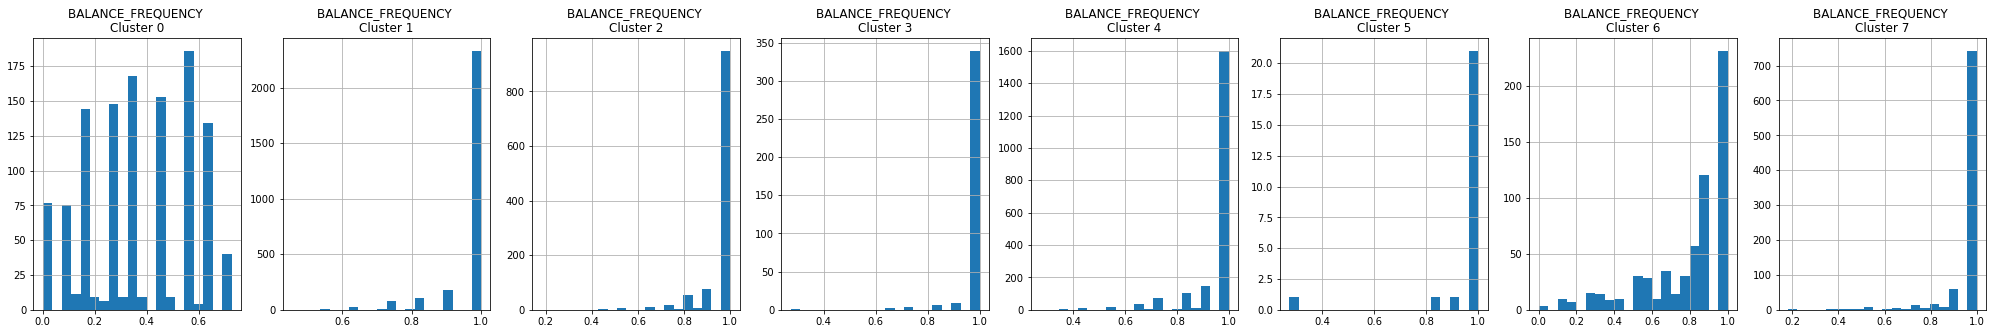

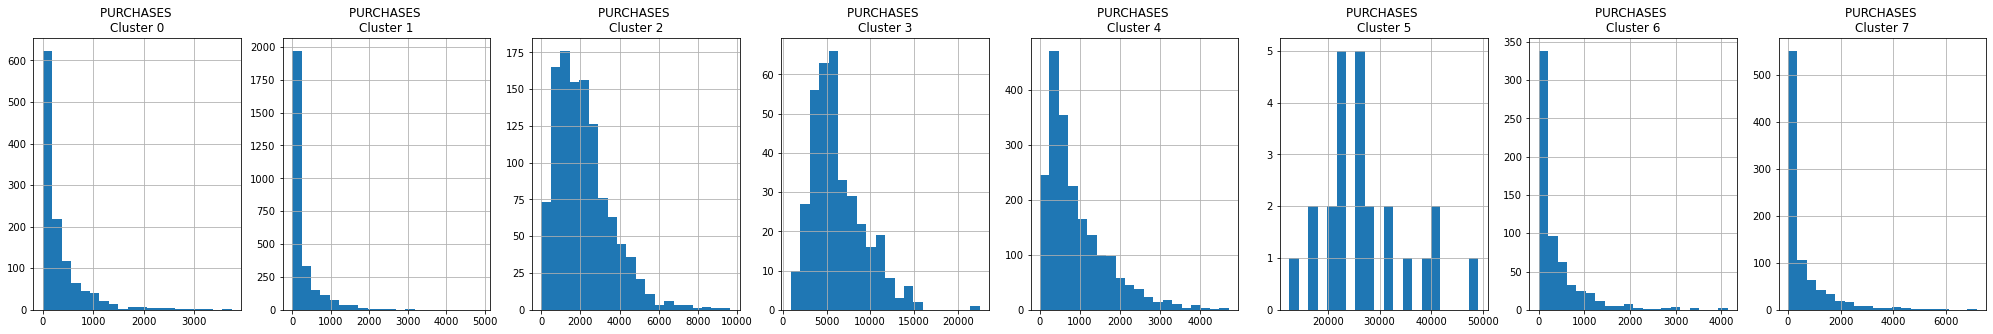

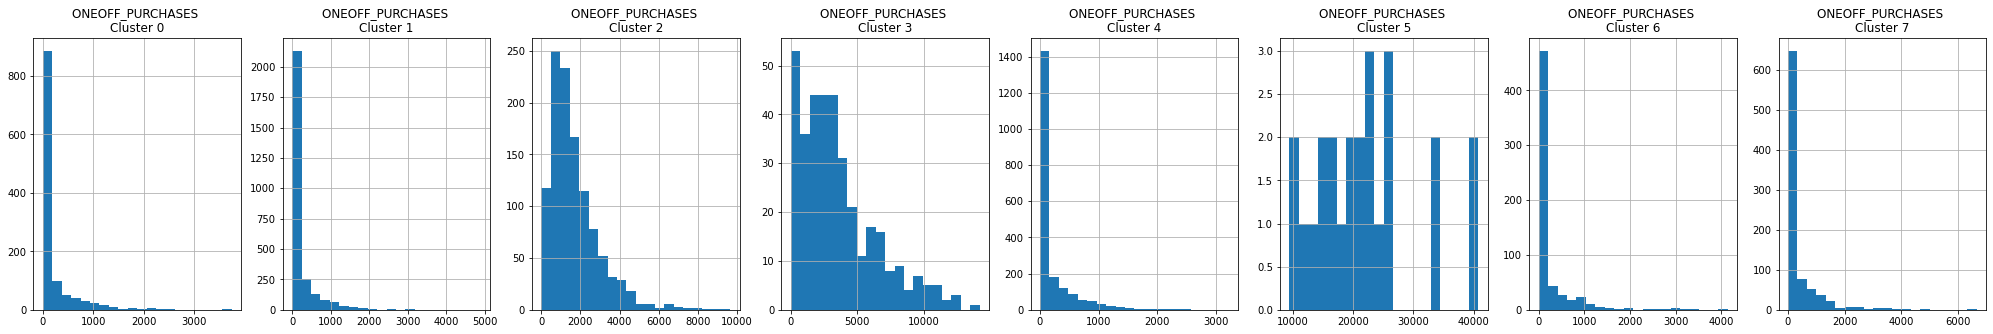

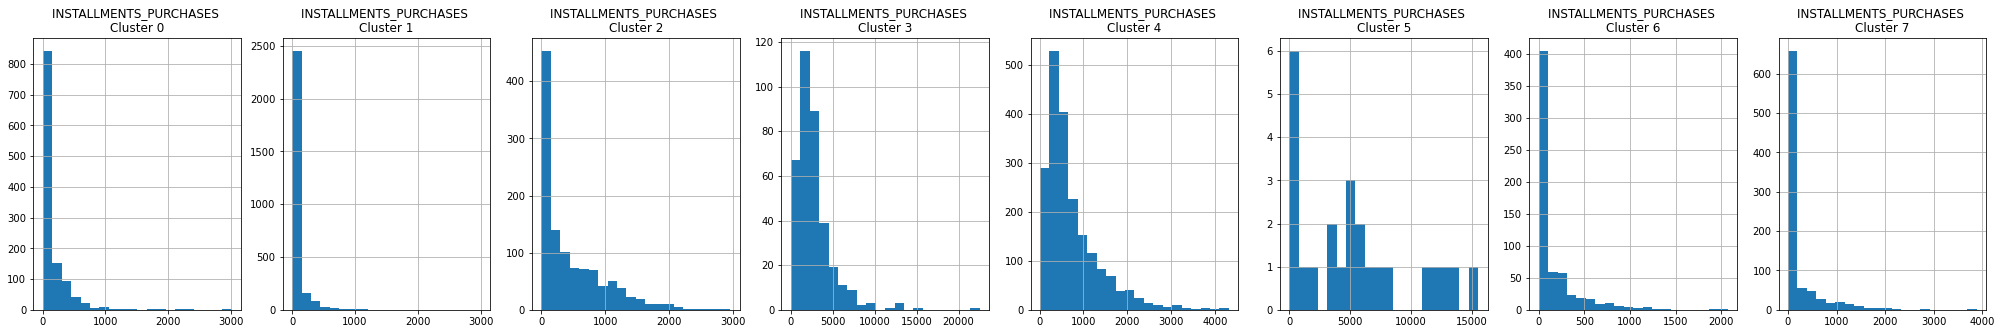

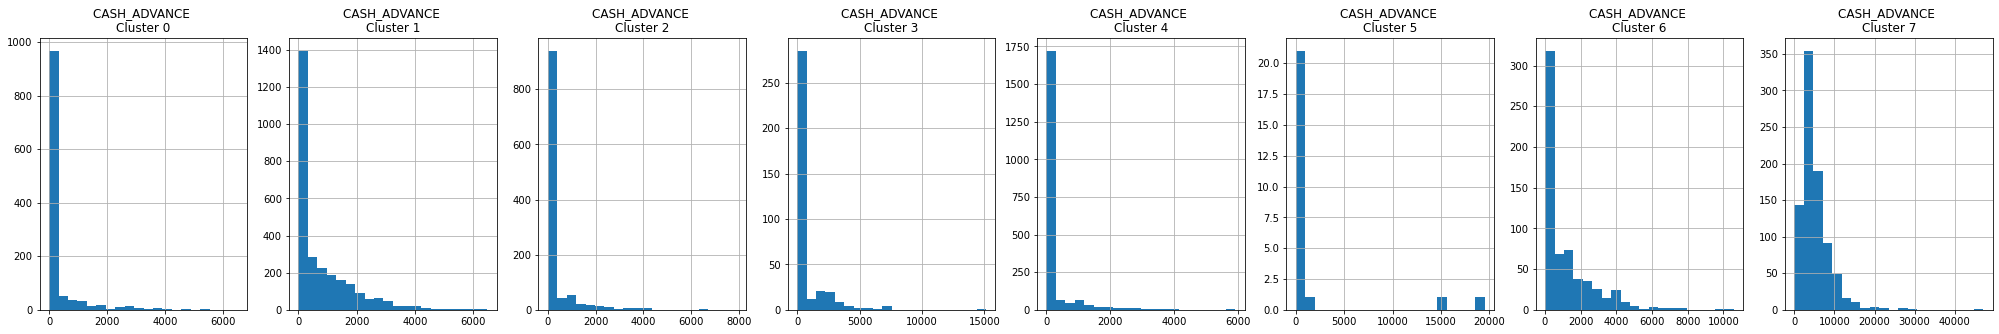

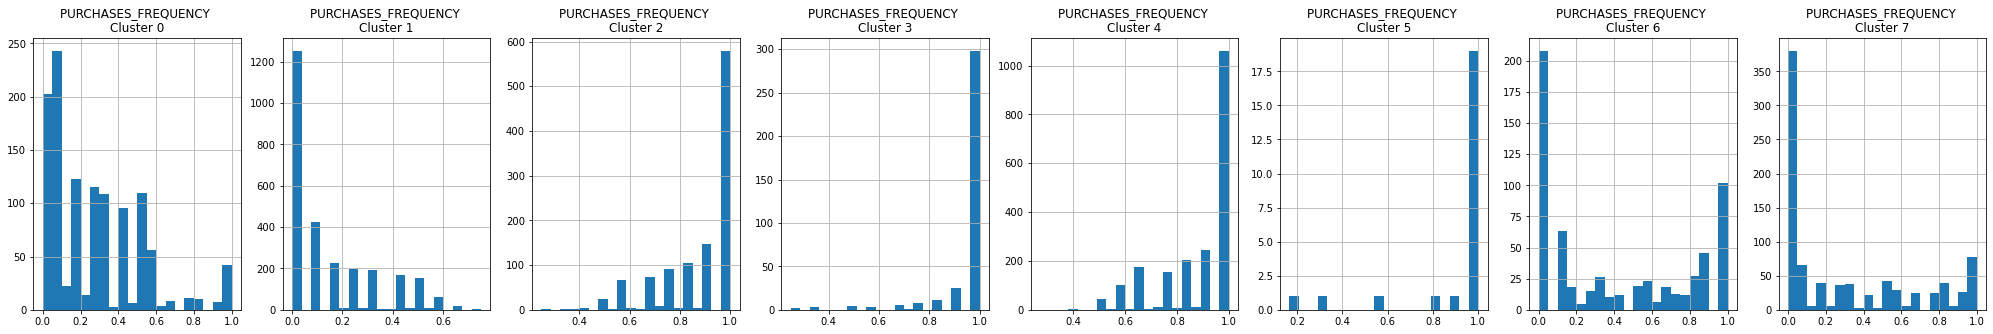

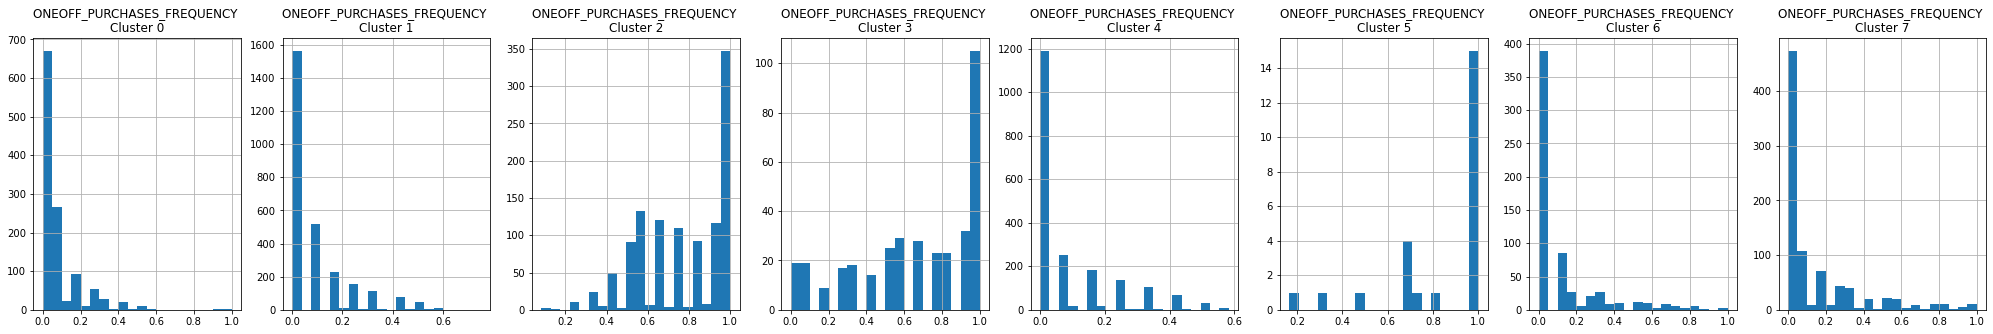

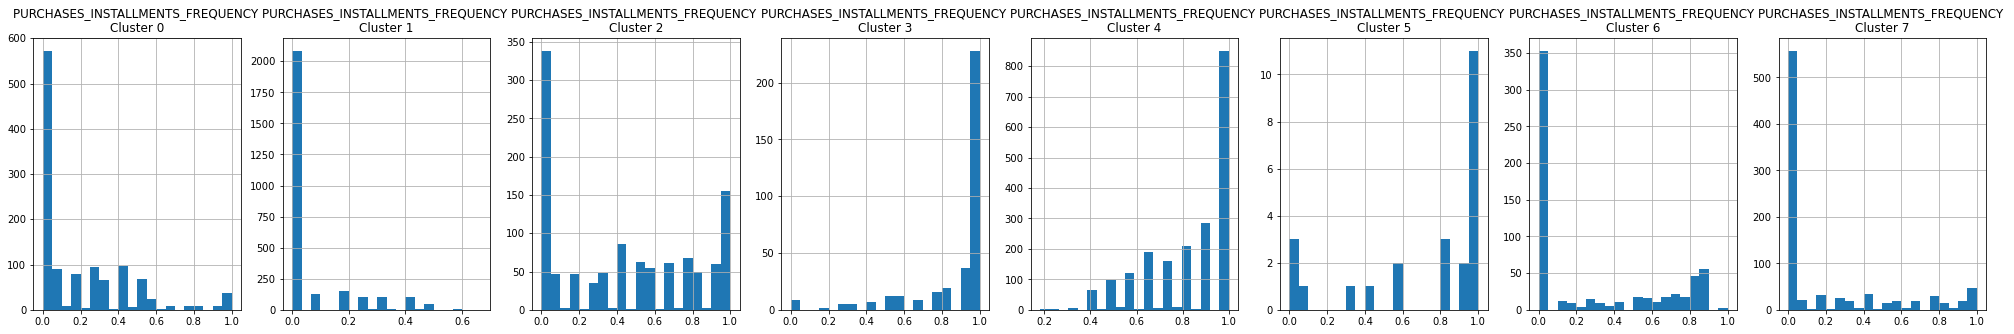

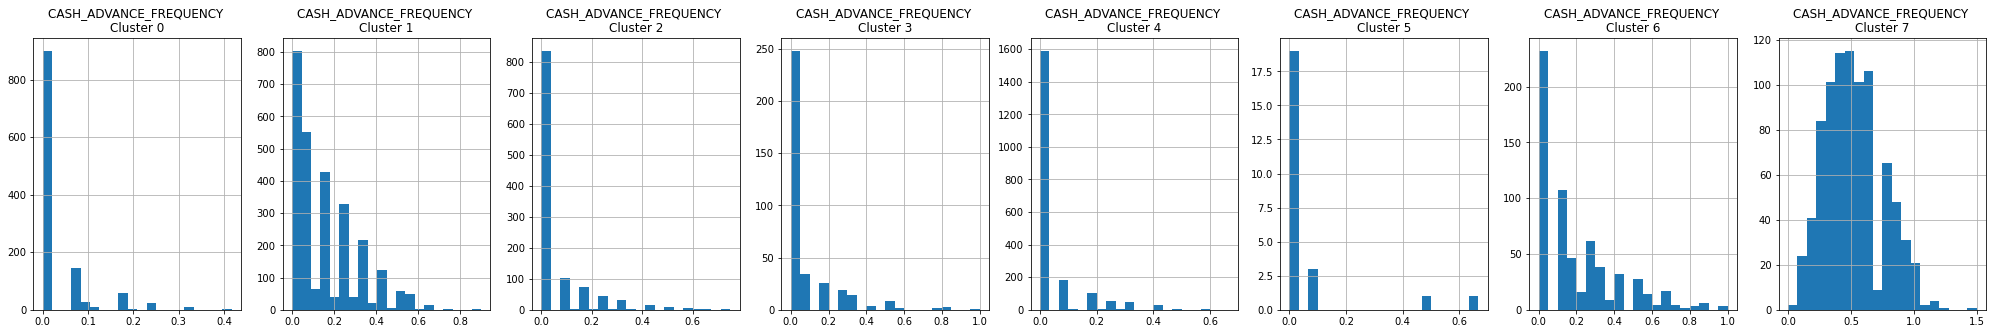

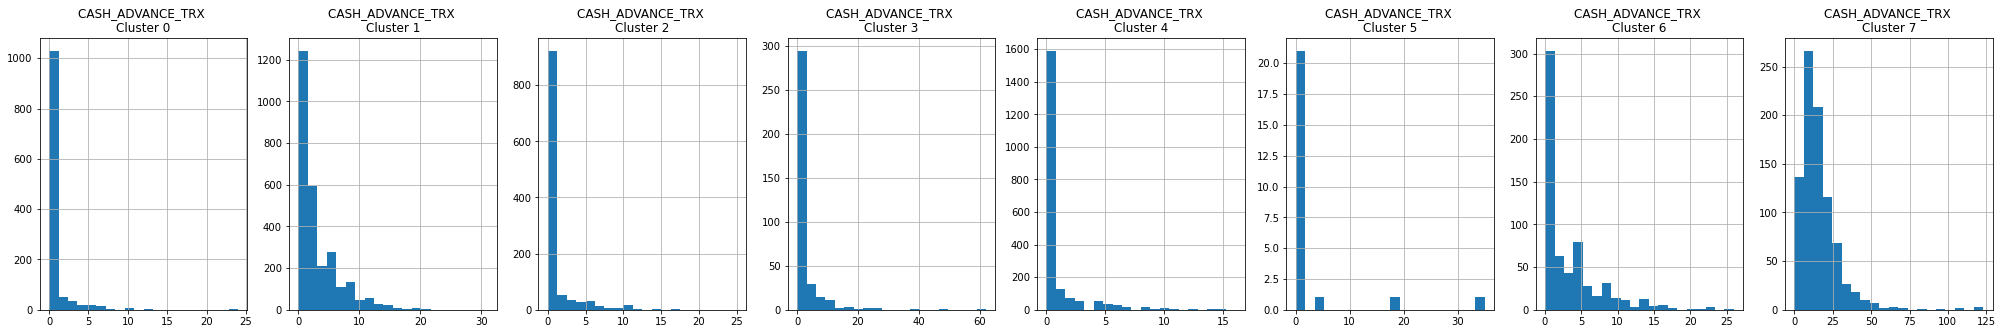

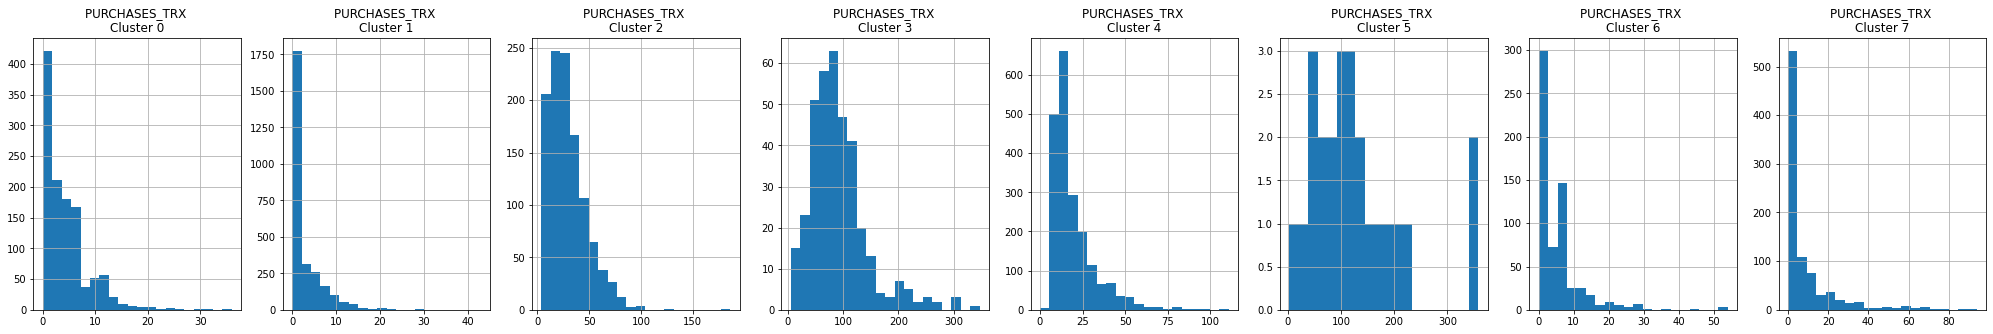

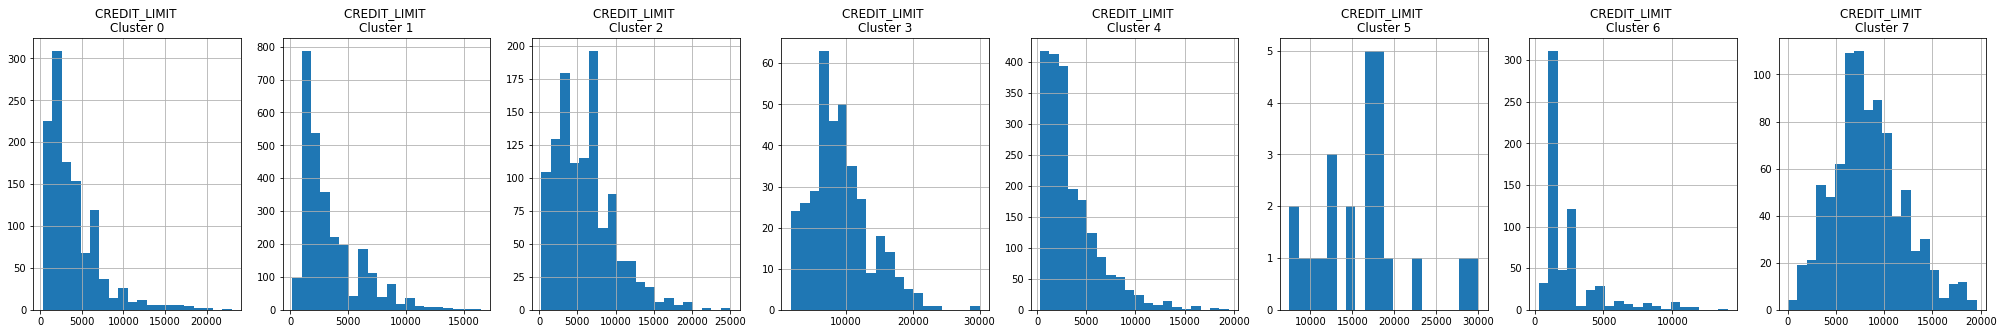

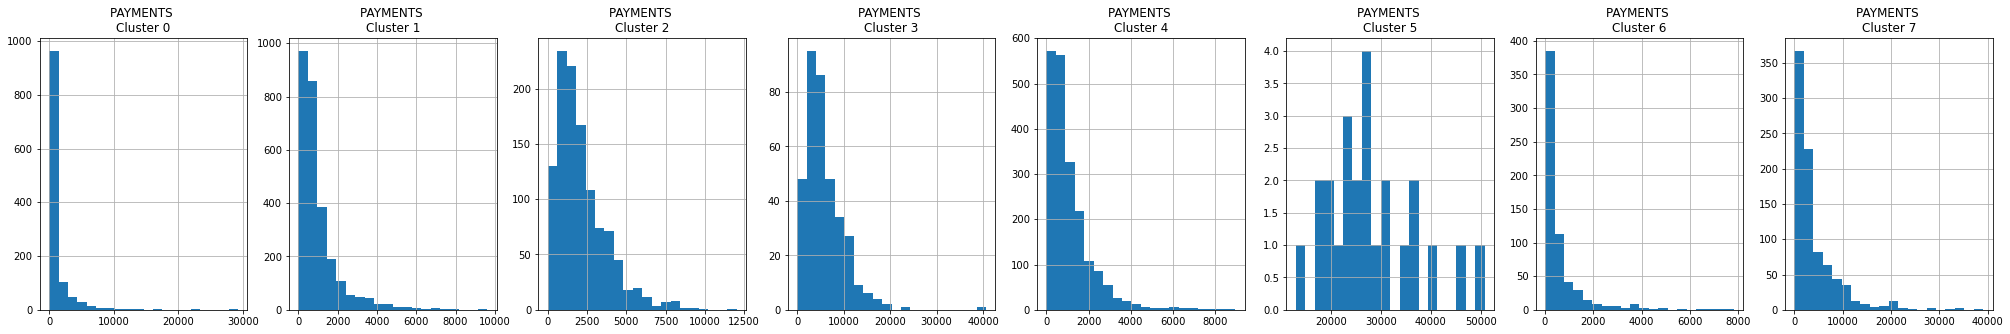

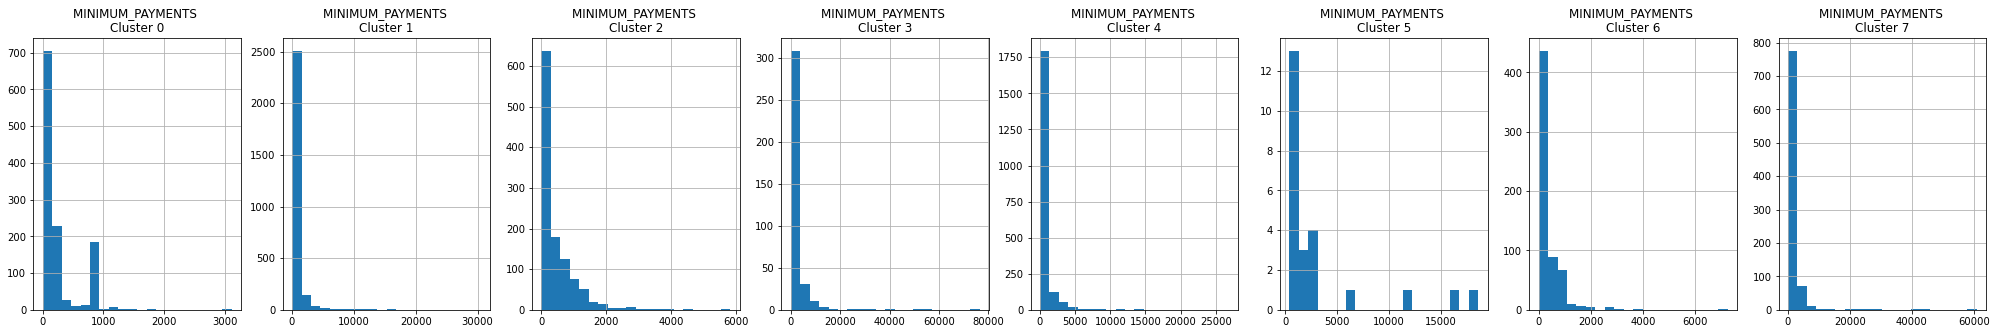

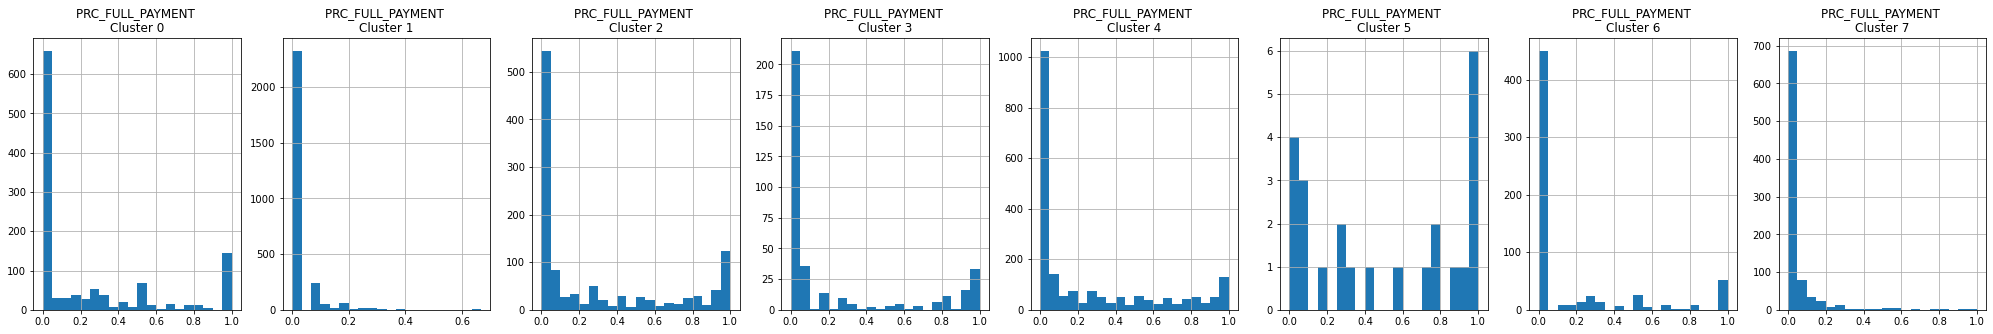

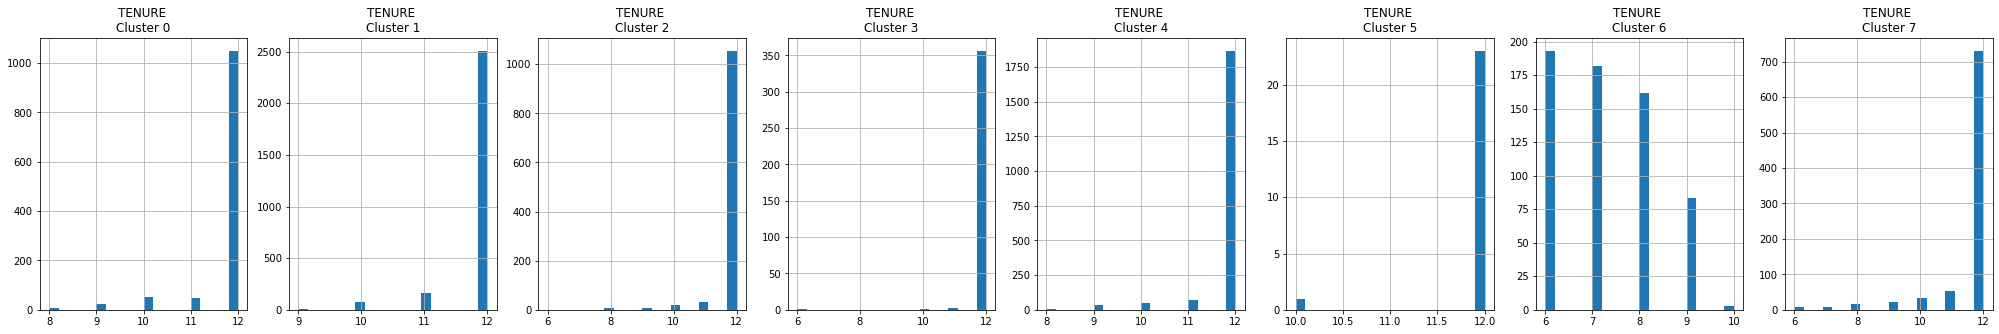

In [35]:
# plot histograms for each cluster
for i in df.columns:
    plt.figure(figsize = (35, 5))
    for j in range (8):
        plt.subplot(1,8, j+1)
        cluster = df_cl[df_cl["Cluster"] == j]
        cluster[i].hist(bins = 20)
        plt.title("{} \nCluster {}".format(i,j))
        
    plt.show()

#### PCA for Demensionality Reduction

In [36]:
# PCA to visualize clusters after reducing features

pca = PCA(n_components=2) # takes all the features and compresses them into 2 features 
principal_comp = pca.fit_transform(df_sc)

In [37]:
principal_comp 

array([[-1.68222134, -1.07645197],
       [-1.13829197,  2.5064586 ],
       [ 0.96967658, -0.38349441],
       ...,
       [-0.92620565, -1.81078193],
       [-2.33655046, -0.65796971],
       [-0.5564202 , -0.40046148]])

In [38]:
# df with 2 components
pca_df = pd.DataFrame(data = principal_comp, columns = ["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076452
1,-1.138292,2.506459
2,0.969677,-0.383494
3,-0.873630,0.043167
4,-1.599434,-0.688583


In [40]:
# concat cluster numbers to pca df - mapping
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076452,1
1,-1.138292,2.506459,7
2,0.969677,-0.383494,2
3,-0.873630,0.043167,1
4,-1.599434,-0.688583,1


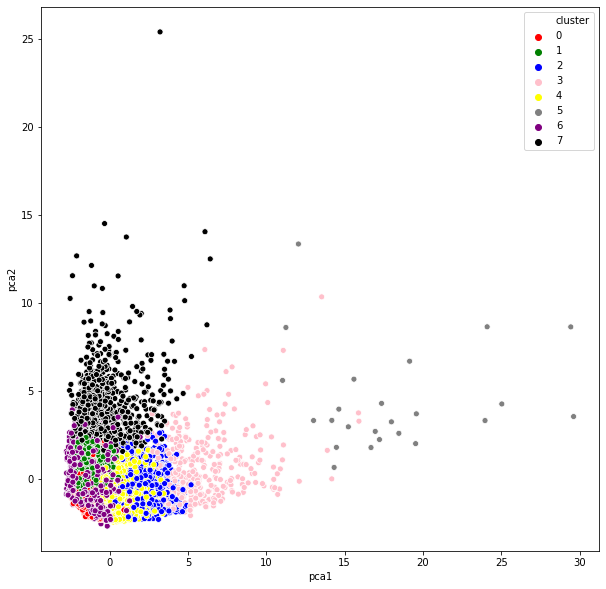

In [41]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue ="cluster", data = pca_df, 
                     palette = ["red", "green", "blue", "pink", "yellow", "grey", "purple", "black"])


### Autoencoders

In [42]:
# Use Keras API to build the model

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD 

In [43]:
# build encoder

input_df = Input(shape = (17,))

x = Dense(7, activation = "relu")(input_df) # this is the first encoding layer
x = Dense(500, activation = "relu", kernel_initializer = "glorot_uniform")(x) # this is another layer with 500 neurons and initializer = glorot_uniformt. The (x) is the previous output
x = Dense(500, activation = "relu", kernel_initializer = "glorot_uniform")(x) # this is another layer with 500 neurons and initializer = glorot_uniformt
x = Dense(2000, activation = "relu", kernel_initializer = "glorot_uniform")(x) # this is another layer with 2k neurons and initializer = glorot_uniformt
encoded = Dense(10, activation = "relu", kernel_initializer = "glorot_uniform")(x)   # build encoded layer

# now build decoded network - inverse process

x = Dense(2000, activation = "relu", kernel_initializer = "glorot_uniform")(encoded) # 1st layer of decoder
x = Dense(500, activation = "relu", kernel_initializer = "glorot_uniform")(x) # 2nd layer

decoded = Dense(17, kernel_initializer = "glorot_uniform")(x)



In [44]:
# build autoencoder

autoencoder = Model(input_df, decoded) # specify input and output

# compiling encoder
encoder = Model(input_df, encoded) # I train the autoencoder for the encoder section

autoencoder.compile(optimizer = "adam", loss = "mean_squared_error")


autoencoder.fit(df_sc, df_sc, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 2s 34ms/step - loss: 0.6616
Epoch 2/25
70/70 [==============================] - 3s 38ms/step - loss: 0.3716
Epoch 3/25
70/70 [==============================] - 3s 42ms/step - loss: 0.2624
Epoch 4/25
70/70 [==============================] - 3s 39ms/step - loss: 0.2336
Epoch 5/25
70/70 [==============================] - 3s 40ms/step - loss: 0.2032: 0s - loss:
Epoch 6/25
70/70 [==============================] - 3s 39ms/step - loss: 0.1835
Epoch 7/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1730
Epoch 8/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1525
Epoch 9/25
70/70 [==============================] - 3s 41ms/step - loss: 0.1400
Epoch 10/25
70/70 [==============================] - 3s 40ms/step - loss: 0.1271
Epoch 11/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1197
Epoch 12/25
70/70 [==============================] - 3s 39ms/step - loss: 0.1131
Epoch 13/25
70/70 [======

In [45]:
# check out the autoencoder
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)             

In [46]:
# perform dimensionality reduction with autoencoders
pred = encoder.predict(df_sc)  

In [47]:
pred.shape 

(8950, 10)

In [48]:
# Optimal number of clusters

scores_2 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred) # feed the model with the predictions of the autoencoder
    scores_2.append(kmeans.inertia_)

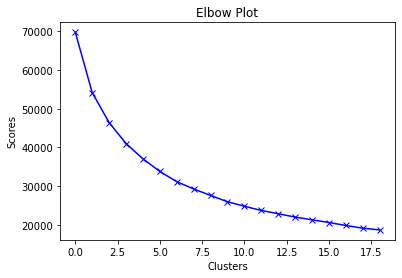

In [49]:
plt.plot(scores_2, "bx-")
plt.title("Elbow Plot")
plt.xlabel("Clusters")
plt.ylabel("Scores")
plt.show()

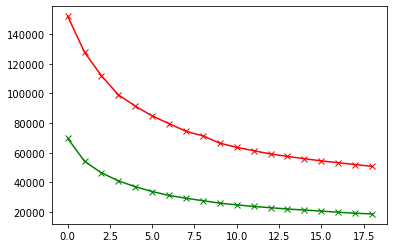

In [50]:
# Plot Elbows of 17 features and 10 features
plt.plot(score_1, "bx-", color = "r")
plt.plot(scores_2, "bx-", color = "g")

In [51]:
# let's pick K = 4

In [52]:
# Apply k-means

kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_


In [53]:
# concat labels to df
df_cluster_dr = pd.concat([df, pd.DataFrame({"Cluster":labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [54]:
# Apply PCA
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(pred) # applied to the output of the autoencoders

In [55]:
principal_comp 

array([[-1.3976152 , -0.40760028],
       [ 1.8704714 , -1.9303101 ],
       [-1.6990609 ,  0.8647224 ],
       ...,
       [ 0.15035354,  0.35109487],
       [ 1.0116284 , -0.76255864],
       [ 1.5479287 ,  0.2561082 ]], dtype=float32)

In [56]:
pca_df = pd.DataFrame(data = principal_comp, columns = ["pca1", "pca2"]) 

In [57]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1) 
pca_df.head()

,pca1,pca2,cluster
0,-1.397615,-0.407600,0
1,1.870471,-1.930310,2
2,-1.699061,0.864722,0
3,0.489870,-0.430749,2
4,-1.329189,-0.546360,0


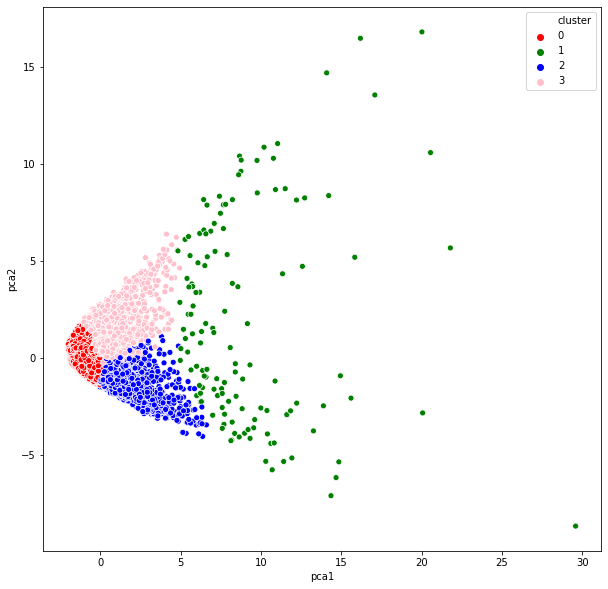

In [58]:
# visualize PCA output

plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df, palette = ["red", "green", "blue", "pink"])